In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [3]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 25.1041374483944, 1.24608*1e5, 4629.89033353505/3600, "R10")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 71.900, 1.19923*1e5, cold1_In.M, "R11")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 45.1678728, 7.797*1e5, 64369.9656058844/3600, "R21")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 70.0701963, 7.69764*1e5, cold2_In.M, "R21a")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 73.500, 19.4606947600000*1e5, 10416.0/3600, "F05")
mainH2_In.x_para = 0.1/(math.exp(-175/mainH2_In.T)+0.1) - 7.06*(10**-9)*(mainH2_In.T**3) \
                        + 3.42*(10**-6)*(mainH2_In.T**2) - 6.2*(10**-5)*mainH2_In.T - 0.00227
print("F05 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 46.00, 19.4606947600000*1e5, mainH2_In.M, "F06")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 74.000, 29.51096*1e5, 37949.9207666807/3600, "R04a")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 47.400, 29.42934*1e5, hot_In.M, "R05")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R10
M [kg/s]    =  1.2861
P [bar]     =  1.246
T [Kelvin]  =  25.1
H [kJ/kg]   =  499.643
S [kJ/kg.K] =  23.494


Stream R11
M [kg/s]    =  1.2861
P [bar]     =  1.199
T [Kelvin]  =  71.9
H [kJ/kg]   =  998.324
S [kJ/kg.K] =  34.922


Stream R21
M [kg/s]    =  17.8805
P [bar]     =  7.797
T [Kelvin]  =  45.17
H [kJ/kg]   =  676.086
S [kJ/kg.K] =  21.702


Stream R21a
M [kg/s]    =  17.8805
P [bar]     =  7.698
T [Kelvin]  =  70.07
H [kJ/kg]   =  960.033
S [kJ/kg.K] =  26.776


HOT STREAMS(from ASPEN HYSYS)
F05 p-H2 mole fraction: 0.528
Stream F05
M [kg/s]    =  2.8933
P [bar]     =  19.461
T [Kelvin]  =  73.5
H [kJ/kg]   =  1295.336
S [kJ/kg.K] =  30.218


Stream F06
M [kg/s]    =  2.8933
P [bar]     =  19.461
T [Kelvin]  =  46.0
H [kJ/kg]   =  731.612
S [kJ/kg.K] =  20.488


Stream R04a
M [kg/s]    =  10.5416
P [bar]     =  29.511
T [Kelvin]  =  74.0
H [kJ/kg]   =  947.845
S [kJ/kg.K] =  21.244


Stream R05
M [kg/s]    =  10.5416
P [bar]     =  29

In [5]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(cold1_In.M*(cold1_In.H-cold1_Out.H) + x*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow2A = res.x

cold2A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow2A, "R21A")
cold2A_In.printState()
cold2B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold2_In.M-massFlow2A, "R21B")
cold2B_In.printState()

Stream R21A
M [kg/s]    =  12.1351
P [bar]     =  7.797
T [Kelvin]  =  45.17
H [kJ/kg]   =  676.086
S [kJ/kg.K] =  21.702


Stream R21B
M [kg/s]    =  5.7454
P [bar]     =  7.797
T [Kelvin]  =  45.17
H [kJ/kg]   =  676.086
S [kJ/kg.K] =  21.702




In [6]:
nParallelHx = 2

lengthPFHX = 3.921
widthPFHX = 1.500
heightPFHX = 1.3709
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 3.2218
widthHXA      = 1.500
heightHXA     = 0.9445
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  3.921
Width  [m]  =  1.5
Height [m]  =  1.3709
Volume [m3] =  8.063


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  3.2218
Width  [m]  =  1.5
Height [m]  =  0.9445
Volume [m3] =  4.564


HXB Geometry
Length [m]  =  3.921
Width  [m]  =  1.5
Height [m]  =  0.595
Volume [m3] =  3.498




Final HX-5 Geometry
Length [m]  =  6.0
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  27.0


HX-B Geometry
Length [m]  =  6.0
Width  [m]  =  1.5
Height [m]  =  2.493
Volume [m3] =  22.436

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.03e-02       0.00e+00          50             54       
       2          3.21e-04       0.00e+00          104             3       
       3          3.20e-04       0.00e+00          107             1       
       4          3.21e-04       0.00e+00          108             1       
       5          8.25e-05       0.00e+00          109             0       
Solved in 5 iterations, number of nodes 109. 
Maximum relative residual: 8.25e-05 
Maximum boundary residual: 0.00e+00


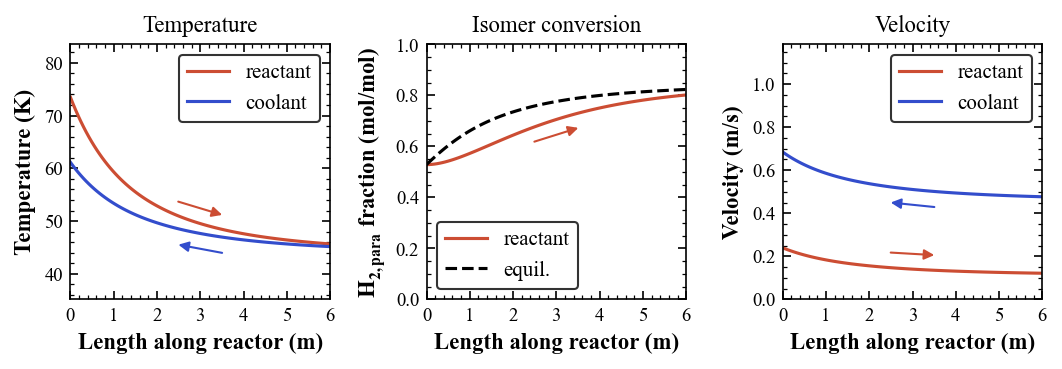

In [7]:
#Adjusted geometry
lengthPFHX = 6.000
widthPFHX = 1.500
heightPFHX = 3.000
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold2B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-5 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [8]:
print(results)

        Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0    0.000000              1946.069476              779.521133   
1    0.061224              1946.017270              779.523577   
2    0.122449              1945.966171              779.525985   
3    0.183673              1945.916123              779.528359   
4    0.244898              1945.867072              779.530702   
..        ...                      ...                     ...   
104  5.755102              1942.961756              779.693545   
105  5.816327              1942.935523              779.695161   
106  5.877551              1942.909334              779.696775   
107  5.938776              1942.883188              779.698388   
108  6.000000              1942.857085              779.700000   

     Reactant temperature (K)  Coolant temperature (K)  \
0                   73.500000                61.161387   
1                   72.238698                60.474337   
2                   71.043925    